In [52]:
%matplotlib inline
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
import pywt
from scipy import ndimage, misc
from sklearn import metrics
from skimage.measure import structural_similarity as ssim

# Image Exploring

## colorfull image

In [53]:
f = misc.face()
misc.imsave('face.png', f)

In [54]:
face = misc.imread('face.png')

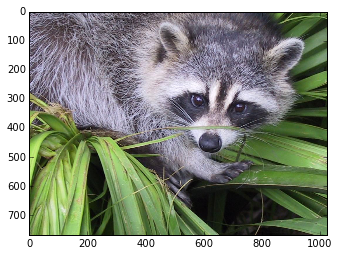

In [55]:
plt.imshow(face)

In [56]:
face.shape

(768L, 1024L, 3L)

## gray scale image

In [57]:
gray_face = misc.face(gray = True)

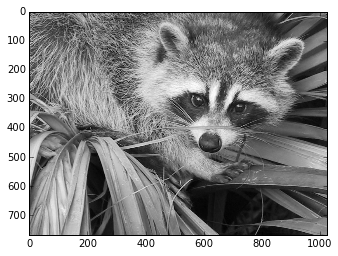

In [58]:
plt.imshow(gray_face, cmap=plt.cm.gray)

In [60]:
gray_face.shape

(768L, 1024L)

# Gray scale image compresion

In [61]:
coeffs = pywt.wavedec2(gray_face, 'db1', level=2)
cA2, (cH2, cV2, cD2), (cH1, cV1, cD1) = coeffs
print cA2

[[ 438.5   530.    488.   ...,  618.25  496.75  499.75]
 [ 416.    557.    483.75 ...,  415.5   461.    490.5 ]
 [ 408.25  423.25  626.25 ...,  497.25  430.    267.  ]
 ..., 
 [ 528.    472.    519.   ...,  561.75  568.    556.  ]
 [ 478.5   496.    517.5  ...,  571.    574.25  574.25]
 [ 447.25  520.5   552.   ...,  569.5   571.25  571.75]]


In [62]:
cA2.shape

(192L, 256L)

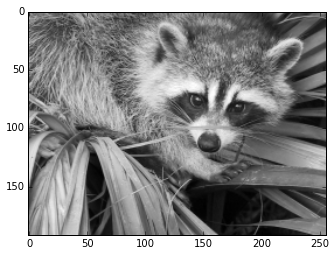

In [63]:
plt.imshow(cA2, cmap=plt.cm.gray)

# Gray scale decompresion

In [64]:
coeffs = cA2, (None, None, None), (None, None, None)
A2 = pywt.waverec2(coeffs, 'db1')

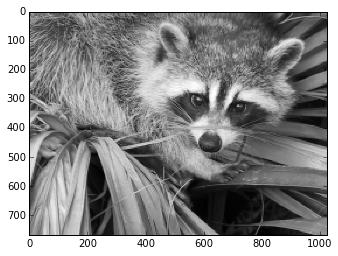

In [65]:
plt.imshow(A2, cmap=plt.cm.gray)

In [66]:
A2.shape

(768L, 1024L)

# Image quality comparision

In [73]:
# gray_face.dtype = float
print metrics.mean_squared_error(gray_face, A2)
# print ssim(gray_face, A2)

244.007901669


In [72]:
gray_face.dtype

dtype('uint8')

In [68]:
A2.dtype

dtype('float64')

In [69]:
gray_face.shape

(768L, 1024L)

In [70]:
A2.shape

(768L, 1024L)